In [1]:
import sys, os, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import random


In [3]:
sys.path.append(
    "/Users/wiegerscheurer/repos/physicspred"
)  # To enable importing from repository folders


from functions.utilities import ordinal_sample, bellshape_sample
from functions.physics import _rotate_90, _dir_to_vec, _vec_to_dir, _flip_dir
from functions.utilities import check_balance, create_balanced_trial_design, build_design_matrix, determine_sequence
from functions.analysis import (get_precision, 
                                get_data, 
                                get_false_negatives,
                                get_false_positives,
                                get_true_positives,
                                get_true_negatives,
                                filter_condition,
                                get_f1_score, 
                                get_rt, 
                                get_accuracy,
                                get_hit_rate,)


In [ ]:
# all_sub_names = ["wolpert", "wunger","scheur", "hendrik", "willem", "ikzelf", "melvin", "paulo", "yifan", "ann", "qifei", "mingyao", "bilge", "yanni", "eva"]
# all_sub_names = ["002634"]
sub_stack = pd.DataFrame()

# for sub_idx, sub in enumerate(all_sub_names):
    this_sub = get_data(subject=f"sub-{sub}", task="ball_hue")
    sub_stack = pd.concat([sub_stack, this_sub])
    
sub_stack.reset_index(inplace=True, drop=True)
# sub_stack

In [14]:
sub_stack = pd.DataFrame()

for subbert in ["uier","woesndao"]:
    this_sub = get_data(subject=f"sub-{subbert}", task="ball_hue")
    sub_stack = pd.concat([sub_stack, this_sub])

sub_stack.reset_index(inplace=True, drop=True)


In [20]:
print(sub_stack['response'].unique())
estimator=lambda x: x.mean()
estimator=lambda x: (x.str.lower().str.strip() == 'lighter').mean()


['darker' 'lighter' nan]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter out NaN responses first
filtered_data = sub_stack.dropna(subset=['response'])

# Create a helper function for the estimator
def lighter_probability(x):
    return np.mean(x == "lighter")

plt.figure(figsize=(10, 6))
sns.pointplot(
    x='ball_color_change',
    y='response',
    data=filtered_data,
    estimator=lighter_probability,  # Use our custom estimator
    ci=95,
    join=True
)
plt.title('Probability of "Lighter" Response by Ball Color Change')
plt.xlabel('Ball Color Change')
plt.ylabel('Probability of "Lighter" Response')
plt.ylim(0, 1)
plt.show()


In [32]:
np.mean(sub_stack["response"] == "lighter")

np.mean(sub_stack["response"] == "darker")

sub_stack["ball_color_change"] == .1

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7      True
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
Name: ball_color_change, dtype: bool

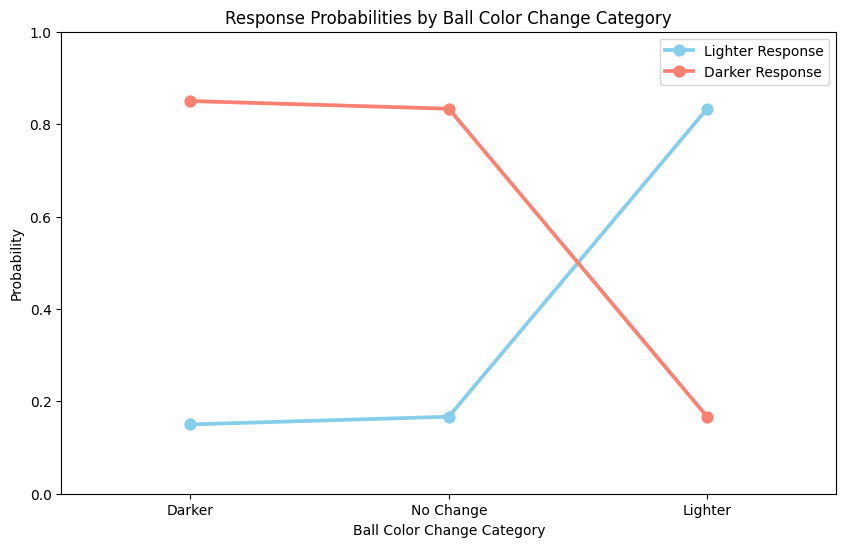

  change_category  lighter_prob  darker_prob
0          Darker      0.150000     0.850000
2       No Change      0.166667     0.833333
1         Lighter      0.833333     0.166667


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# First, let's create a function to categorize the ball_color_change values
def categorize_change(value):
    if value < 0:
        return "Darker"
    elif value > 0:
        return "Lighter"
    else:
        return "No Change"

# Apply this categorization to our data
sub_stack['change_category'] = sub_stack['ball_color_change'].apply(categorize_change)

# Filter out NaN responses
filtered_data = sub_stack.dropna(subset=['response'])

# Calculate probabilities
prob_df = filtered_data.groupby('change_category')['response'].agg(
    lighter_prob = lambda x: np.mean(x == "lighter"),
    darker_prob = lambda x: np.mean(x == "darker")
).reset_index()

# Sort the categories in a logical order
category_order = ["Darker", "No Change", "Lighter"]
prob_df['change_category'] = pd.Categorical(prob_df['change_category'], categories=category_order, ordered=True)
prob_df = prob_df.sort_values('change_category')

# Plot
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='change_category',
    y='lighter_prob',
    data=prob_df,
    color='skyblue',
    label='Lighter Response'
)
sns.pointplot(
    x='change_category',
    y='darker_prob',
    data=prob_df,
    color='salmon',
    label='Darker Response'
)
plt.title('Response Probabilities by Ball Color Change Category')
plt.xlabel('Ball Color Change Category')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.legend()
plt.show()

# Print the probability dataframe for reference
print(prob_df)


/var/folders/3n/yy1xjnlj5zd3nt4r1202183h0000gn/T/ipykernel_29038/2933355570.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x='ball_color_change', y='response', data=sub_stack,
/var/folders/3n/yy1xjnlj5zd3nt4r1202183h0000gn/T/ipykernel_29038/2933355570.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(x='ball_color_change', y='response', data=sub_stack,


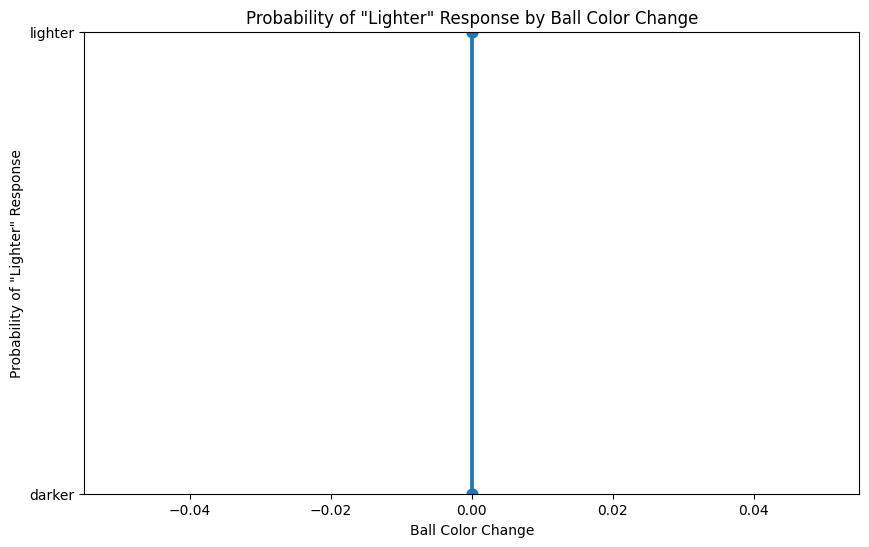

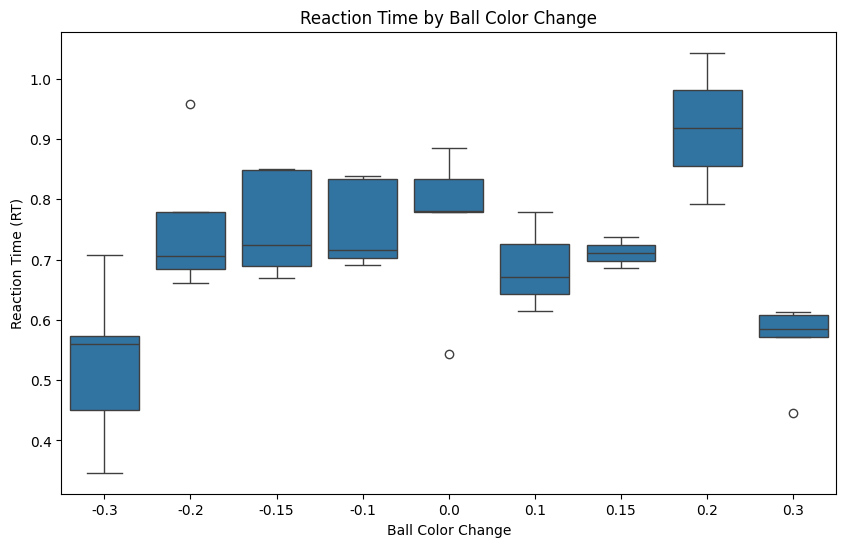

In [16]:
# Plot psychometric curve of the chance

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming testdf is already loaded with your data

# Plot 1: Probability of "lighter" response
plt.figure(figsize=(10, 6))
sns.pointplot(x='ball_color_change', y='response', data=sub_stack, 
              estimator=lambda x: (x == 'darker').mean(),
              ci=95, join=True)
plt.title('Probability of "Lighter" Response by Ball Color Change')
plt.xlabel('Ball Color Change')
plt.ylabel('Probability of "Lighter" Response')
plt.ylim(0, 1)
plt.show()

# Plot 2: Reaction Time by Ball Color Change
plt.figure(figsize=(10, 6))
sns.boxplot(x='ball_color_change', y='rt', data=sub_stack)
plt.title('Reaction Time by Ball Color Change')
plt.xlabel('Ball Color Change')
plt.ylabel('Reaction Time (RT)')
plt.show()
